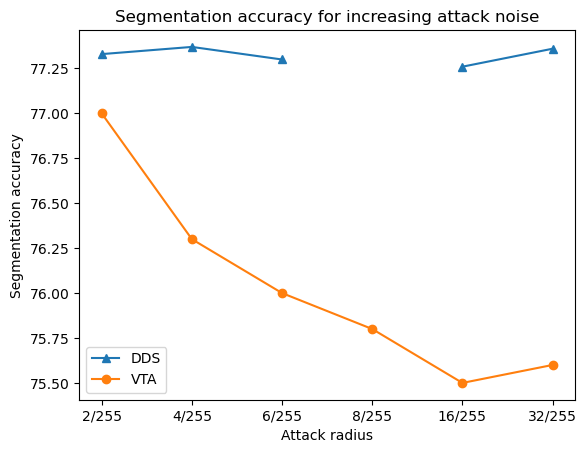

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = ["2/255", "4/255", "6/255", "8/255", "16/255", "32/255"]
y1 = [77.33, 77.37, 77.30, None, 77.26, 77.36]
y2 = [77, 76.3, 76, 75.8, 75.5, 75.6]

plt.title("Segmentation accuracy for increasing attack noise")
plt.xlabel("Attack radius")
plt.ylabel("Segmentation accuracy")
plt.plot(x, y1, marker="^")
plt.plot(x, y2, marker="o")
plt.legend(["DDS", "VTA"])
plt.show()

# Perturbations

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# get a list of directories under baselines/ViT/experiments/perturbations
path = 'FViT-main/baselines/ViT/experiments/perturbations/'
all_directories = os.listdir(path)
if '.DS_Store' in all_directories:
    all_directories.remove('.DS_Store')
pos_directories = sorted([d for d in all_directories if 'pos' in d[-3:]])
neg_directories = sorted([d for d in all_directories if 'neg' in d[-3:]])
print(all_directories)
print(pos_directories)
print(neg_directories)

['attn_gradcam_pos', 'rollout_neg', 'transformer_attribution_neg', 'attn_last_layer_neg', 'full_lrp_neg', 'dds_pos', 'transformer_attribution_pos', 'attn_gradcam_neg', 'rollout_pos', 'full_lrp_pos', 'dds_neg', 'attn_last_layer_pos']
['attn_gradcam_pos', 'attn_last_layer_pos', 'dds_pos', 'full_lrp_pos', 'rollout_pos', 'transformer_attribution_pos']
['attn_gradcam_neg', 'attn_last_layer_neg', 'dds_neg', 'full_lrp_neg', 'rollout_neg', 'transformer_attribution_neg']


In [4]:
sub_path_prefix = 'top/not_ablation/experiment_0'
all_files = {}
for directory in all_directories:
    subpath = os.path.join(path, directory, sub_path_prefix)
    directory_files_content = {}
    for file in os.listdir(subpath):
        file_path = os.path.join(subpath, file)
        if file[-3:] == 'npy':
            directory_files_content[file] = np.load(file_path)
        all_files[directory] = directory_files_content


In [5]:
unique_filenames = set()
for directory in all_files:
    for file in all_files[directory]:
        unique_filenames.add(file)
print(unique_filenames)

{'perturbations_prob_diff.npy', 'perturbations_logit_diff.npy', 'model_dissimilarities.npy', 'model_hits.npy', 'perturbations_hits.npy', 'perturbations_dissimilarities.npy'}


In [6]:
for u_name in unique_filenames:
    for directory in all_files:
        if u_name in all_files[directory]:
            data = all_files[directory][u_name]
            print(directory, u_name, data.shape)

attn_gradcam_pos perturbations_prob_diff.npy (9, 760)
rollout_neg perturbations_prob_diff.npy (9, 760)
transformer_attribution_neg perturbations_prob_diff.npy (9, 760)
attn_last_layer_neg perturbations_prob_diff.npy (9, 760)
full_lrp_neg perturbations_prob_diff.npy (9, 760)
dds_pos perturbations_prob_diff.npy (9, 760)
transformer_attribution_pos perturbations_prob_diff.npy (9, 760)
attn_gradcam_neg perturbations_prob_diff.npy (9, 760)
rollout_pos perturbations_prob_diff.npy (9, 760)
full_lrp_pos perturbations_prob_diff.npy (9, 760)
dds_neg perturbations_prob_diff.npy (9, 760)
attn_last_layer_pos perturbations_prob_diff.npy (9, 760)
attn_gradcam_pos perturbations_logit_diff.npy (9, 760)
rollout_neg perturbations_logit_diff.npy (9, 760)
transformer_attribution_neg perturbations_logit_diff.npy (9, 760)
attn_last_layer_neg perturbations_logit_diff.npy (9, 760)
full_lrp_neg perturbations_logit_diff.npy (9, 760)
dds_pos perturbations_logit_diff.npy (9, 760)
transformer_attribution_pos pertur

In [7]:
data = all_files['dds_pos']['model_dissimilarities.npy']
print(data)

[ 9.00157166e+00  4.90219498e+00  3.90449286e+00  2.15078163e+00
  2.22895050e+00  4.35572910e+00  8.05058861e+00  1.24974537e+00
  6.08376217e+00  2.10044003e+00  8.42339134e+00  6.45492315e+00
  8.70293558e-01  1.64700234e+00  1.87621486e+00  5.76096869e+00
  6.70248795e+00  4.70384312e+00  2.36991882e+00  9.06198692e+00
  3.62934875e+00  8.78499985e+00  8.88054848e+00  7.59158659e+00
  3.26568890e+00  1.19929159e+00  6.20987511e+00  7.22935772e+00
  7.90729427e+00  6.99664974e+00  3.41207790e+00  2.53560448e+00
  8.17204416e-01  1.00578613e+01  3.66968060e+00  7.88995790e+00
 -1.20572376e+00  2.13760853e+00  6.85959625e+00  1.90678561e+00
  9.34103394e+00 -3.52726507e+00  4.80124092e+00  1.75128174e+00
  2.30172253e+00  7.35861301e+00  9.68237782e+00  2.91116238e+00
  6.87549114e+00  4.02888966e+00  4.60462475e+00  7.95302963e+00
  7.41250229e+00 -4.47314119e+00  2.40290070e+00  2.46093845e+00
  1.71638298e+00  3.89856243e+00  9.29193497e+00  8.57410431e+00
  1.27517586e+01  6.46355

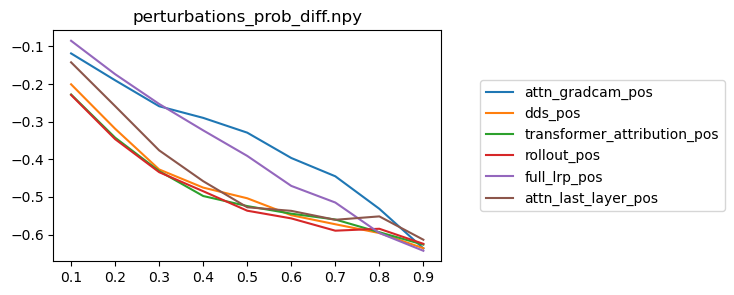

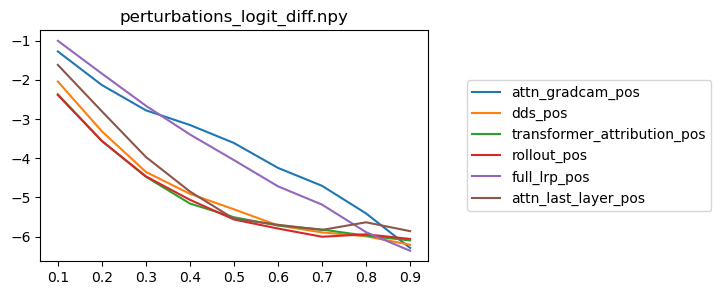

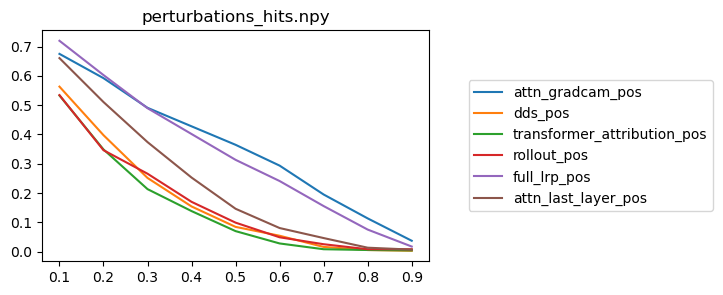

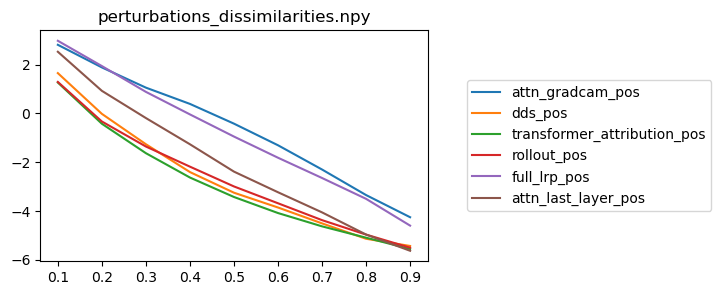

In [8]:
type = 'pos'
x_axis = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for u_name in unique_filenames:
    if u_name in ['model_hits.npy', 'model_dissimilarities.npy']:
        continue
    # line plot of all files, labeled by the directory name
    fig, ax = plt.subplots()
    plt.title(u_name)
    # set image size
    fig.set_size_inches(5, 3)
    # plt.xlabel("Epoch")
    # plt.ylabel("Value")
    for directory in all_files:
        if directory[-3:] != type:
            continue
        if u_name in all_files[directory]:
            # smooth plot
            data = all_files[directory][u_name]
            if data.shape != (9, 760):
                continue
            else:
                data = np.mean(data, 1)
            ax.plot(x_axis, data, label=directory)
    # move the legend to the right, outside of the plot
    ax.legend(loc='center right', bbox_to_anchor=(1.75, 0.5))
    # plt.tight_layout()
    plt.show()
    

In [9]:
desired_score = "perturbations_hits.npy"
types = ['pos', 'neg']
auc = {}
for type in types:
    auc_type = {}
    for directory in all_files:
        if directory[-3:] != type:
            continue
        data = all_files[directory][desired_score]
        data = np.mean(data, 1)
        auc_dir = np.trapz(data) / 8
        auc_type[directory] = auc_dir
    auc[type] = auc_type
print(auc)

{'pos': {'attn_gradcam_pos': 0.3540296052631579, 'dds_pos': 0.1555921052631579, 'transformer_attribution_pos': 0.13486842105263158, 'rollout_pos': 0.15411184210526316, 'full_lrp_pos': 0.33075657894736843, 'attn_last_layer_pos': 0.21949013157894737}, 'neg': {'rollout_neg': 0.6006578947368421, 'transformer_attribution_neg': 0.6064967105263158, 'attn_last_layer_neg': 0.5026315789473684, 'full_lrp_neg': 0.44391447368421055, 'attn_gradcam_neg': 0.42796052631578946, 'dds_neg': 0.601891447368421}}


In [10]:
# present auc in a table
import pandas as pd
df = pd.DataFrame(auc)
# remove _pos and _neg from the names
df.index = [name[:-4] for name in df.index]
# combine rows having the same name
# each unique name has either pos or neg as NaN. Combine them
df = df.groupby(df.index).mean()
print(df)

                              pos       neg
attn_gradcam             0.354030  0.427961
attn_last_layer          0.219490  0.502632
dds                      0.155592  0.601891
full_lrp                 0.330757  0.443914
rollout                  0.154112  0.600658
transformer_attribution  0.134868  0.606497


In [11]:
# canvas_size = [1200, 1600]
# # create blank rgba canvas
# for noise in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
#     canvas = np.zeros((canvas_size[0], canvas_size[1], 4), dtype=np.uint8)
#     # set pixels to white with probability noise
#     canvas[np.random.rand(*canvas_size) < noise] = 255
#     # no axes 
#     plt.axis('off')
#     #transparent background
#     
#     #save the canvas
#     plt.imsave(f"noise_{noise}.png", canvas)
#     plt.imshow(canvas)
    
